In [1]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet

import string

import re

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# import data
df = pd.read_csv('abusive_language_data.csv')
print(df.shape)
df.head()

(40623, 11)


,Unnamed: 0,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator
0,1,10000,It should be legal for a husband to rape his wife,hate,notgiven,True,0.97457,dynabench entry,1,train,gnzuctwed3
1,2,10001,dalits are lowlife scum,hate,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm
2,3,10002,dalits are lowlives,hate,notgiven,True,0.92319,dynabench entry,1,train,cagnluiznm
3,4,10003,It was a better world when women dare not ques...,hate,notgiven,True,0.99006,dynabench entry,1,test,gnzuctwed3
4,5,10004,I don't work this hard so that those immigrant...,hate,notgiven,True,0.98836,dynabench entry,1,train,cagnluiznm


In [3]:
df.isnull().sum()

Unnamed: 0            0
id                    0
text                  0
label                 0
type                  0
model_wrong       14526
db.model_preds    14526
status                0
round                 0
split                 0
annotator             0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df = df.dropna()
df.shape

(26097, 11)

In [6]:
df['label'].value_counts()

hate       15253
nothate    10844
Name: label, dtype: int64

In [10]:
# redefine the df as only inclusing those texts where the annotator and the model agreed (i.e., where model_wrong == False)
df = df[df['model_wrong'] == False]
df.head()

,Unnamed: 0,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator
1,2,10001,dalits are lowlife scum,hate,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm
9,10,10009,I don't work this hard so that all those pakis...,hate,notgiven,False,0.09288,dynabench entry,1,train,cagnluiznm
10,11,10010,I don't work this hard so that all those musli...,hate,notgiven,False,0.46144,dynabench entry,1,train,cagnluiznm
21,22,10022,Why is it that Africans smell weird? Do they n...,hate,notgiven,False,0.37971,dynabench entry,1,train,cagnluiznm
26,27,10027,I dont hate hindus,nothate,none,False,0.97793,dynabench entry,1,train,vde7gn0nrl


In [11]:
df['model_wrong'].value_counts()

False    10661
Name: model_wrong, dtype: int64

In [12]:
df.head()

,Unnamed: 0,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator
1,2,10001,dalits are lowlife scum,hate,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm
9,10,10009,I don't work this hard so that all those pakis...,hate,notgiven,False,0.09288,dynabench entry,1,train,cagnluiznm
10,11,10010,I don't work this hard so that all those musli...,hate,notgiven,False,0.46144,dynabench entry,1,train,cagnluiznm
21,22,10022,Why is it that Africans smell weird? Do they n...,hate,notgiven,False,0.37971,dynabench entry,1,train,cagnluiznm
26,27,10027,I dont hate hindus,nothate,none,False,0.97793,dynabench entry,1,train,vde7gn0nrl


In [13]:
cond = df['label'] == 'hate'

In [14]:
# print sample of first 10 texts labeled "correctly" as hate:

for t in df[cond]['text'][:20]:
    print(t)
    print('\n')

dalits are lowlife scum


I don't work this hard so that all those pakis can take the benefits


I don't work this hard so that all those muslims can take the benefits


Why is it that Africans smell weird? Do they not wash?


Arabs are dumb


Be quiet, you silly little girl


Gay men are such crybabies


her personality is filthy lol, typical woman


Refugees are disgusting


Refugees are dirty


down syndrome is retarded


Foreigners suck


discrimination against homos is not wrong and disgusting, its good


Britain is full of dogs


black people need to die


gay people need to die


gays need to die


refugees need to die


girls need to die


lesbians need to die




In [361]:
df['label'].value_counts()

hate       5441
nothate    5220
Name: label, dtype: int64

In [365]:
# lowercase all words:
def make_lower(a_string):
    return a_string.lower()

# test it
my_sent = 'ALL CAPS AND NOTHING ELSE HERE'
make_lower(my_sent)

'all caps and nothing else here'

In [366]:
# look at "new" df
df.head(10)

,Unnamed: 0,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator
1,2,10001,dalits are lowlife scum,hate,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm
9,10,10009,I don't work this hard so that all those pakis...,hate,notgiven,False,0.09288,dynabench entry,1,train,cagnluiznm
10,11,10010,I don't work this hard so that all those musli...,hate,notgiven,False,0.46144,dynabench entry,1,train,cagnluiznm
21,22,10022,Why is it that Africans smell weird? Do they n...,hate,notgiven,False,0.37971,dynabench entry,1,train,cagnluiznm
26,27,10027,I dont hate hindus,nothate,none,False,0.97793,dynabench entry,1,train,vde7gn0nrl


In [367]:
df['new_label'] = np.where(cond, 'abusive', 'not abusive')

<AxesSubplot:>

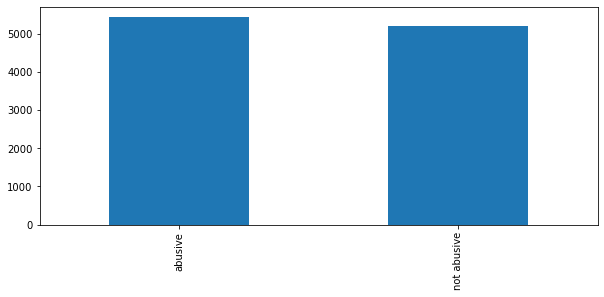

In [368]:
plt.figure(figsize=(10,4))
df.new_label.value_counts().plot(kind='bar')

In [369]:
# lower case only, leave punc in, don't stem words

df['text_clean'] = df['text'].apply(make_lower)

In [24]:
df.head()

,Unnamed: 0,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator,new_label,text_clean
1,2,10001,dalits are lowlife scum,hate,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm,abusive,dalits are lowlife scum
9,10,10009,I don't work this hard so that all those pakis...,hate,notgiven,False,0.09288,dynabench entry,1,train,cagnluiznm,abusive,i don't work this hard so that all those pakis...
10,11,10010,I don't work this hard so that all those musli...,hate,notgiven,False,0.46144,dynabench entry,1,train,cagnluiznm,abusive,i don't work this hard so that all those musli...
21,22,10022,Why is it that Africans smell weird? Do they n...,hate,notgiven,False,0.37971,dynabench entry,1,train,cagnluiznm,abusive,why is it that africans smell weird? do they n...
26,27,10027,I dont hate hindus,nothate,none,False,0.97793,dynabench entry,1,train,vde7gn0nrl,not abusive,i dont hate hindus


In [370]:
df.shape

(10661, 13)

In [371]:
# define variables:

X = df['text_clean'].values

y = df['new_label'].values

In [372]:
# now try using n_grams

vectorizer_ng = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer_ng.fit_transform(X)

In [373]:
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42)

model = svm.SVC(probability=True)

model.fit(X_train, y_train)

SVC(probability=True)

In [29]:
accuracy = model.score(X_test, y_test)
print('Accuracy', accuracy)

Accuracy 0.8604651162790697


In [30]:
y_pred = model.predict(X_test)

In [31]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     abusive       0.88      0.83      0.86      1328
 not abusive       0.84      0.89      0.86      1338

    accuracy                           0.86      2666
   macro avg       0.86      0.86      0.86      2666
weighted avg       0.86      0.86      0.86      2666



In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
metrics.plot_confusion_matrix(estimator=model, 
                              X=X_test, 
                              y_true=y_test, 
                              ax=ax)

In [ ]:
# pipeline for building and evaluating models

def build_and_eval_model(model, X, Y, random_state=42):
    print('Running report for model', model)
    
    # test, train, split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=random_state)
    
    # fit the model
    model.fit(X_train, y_train)
    
    # get and print accuracy
    accuracy = model.score(X_test, y_test)
    print('\n\nAccuracy %f' % accuracy)
    
    # makde new predictions
    y_pred = model.predict(X_test)
    
    # print classification report
    print(metrics.classification_report(y_test, y_pred))
    
    # plot confusion matrix
    fig, ax = plt.subplots(figsize=(13,13))
    
    metrics.plot_confusion_matrix(estimator=model,
                                 X=X_test,
                                 y_true=y_test,
                                 ax=ax)
    
    return model

In [ ]:
# Multinomial NB
mnb = MultinomialNB()
build_and_eval_model(mnb, X, y)

In [ ]:
# Logistic Regression
lr = LogisticRegression()
build_and_eval_model(lr, X, y)

In [ ]:
# Random Forest
rf = RandomForestClassifier()
build_and_eval_model(rf, X, y)